Enter the number of pallets with dimensions 80 x 120 cm:  9
Enter the number of pallets with dimensions 100 x 120 cm:  10
Enter the bin width (in cm):  235
Enter the bin length (in cm):  590


6/9 Pallets 80 x 120 cm | 5/10 Pallets 100 x 120 cm


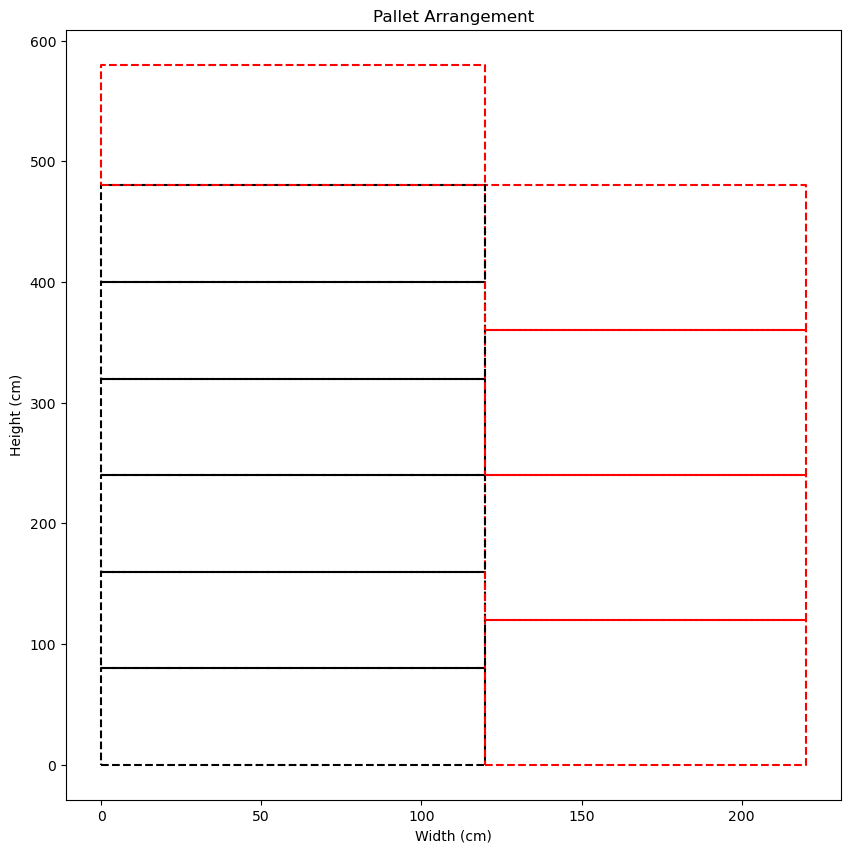

In [2]:
import matplotlib.pyplot as plt
from rectpack import newPacker
import rectpack.packer as packer


def plot_solution(all_rects, pal_812, pal_1012):
    
    plt.figure(figsize=(10, 10))
    
    # Loop through all rectangles and plot them
    for rect in all_rects:
        b, x, y, w, h, rid = rect
        x_coords = [x, x + w, x + w, x, x]
        y_coords = [y, y, y + h, y + h, y]
        
       
        if sorted([w, h]) == sorted(pal_812):
            color = '--k'  # Black dashed line for 80 x 120 pallets
        elif sorted([w, h]) == sorted(pal_1012):
            color = '--r'  # Red dashed line for 100 x 120 pallets
        else:
            color = '--g'  
        
        
        plt.plot(x_coords, y_coords, color)
    
    # Show the plot
    plt.title("Pallet Arrangement")
    plt.xlabel("Width (cm)")
    plt.ylabel("Height (cm)")
    plt.show()

# Function to solve the packing problem
def solver(n_812, n_1012, bins):
    # Pallet dimensions
    pal_812 = [80, 120]  # 80 x 120 cm
    pal_1012 = [100, 120]  # 100 x 120 cm
    
    # Create a list of rectangles to pack
    rectangles = [pal_812 for _ in range(n_812)] + [pal_1012 for _ in range(n_1012)]
    
    
    pack = newPacker(mode=packer.PackingMode.Offline, bin_algo=packer.PackingBin.Global, rotation=True)
    
    # Add rectangles to the packer
    for r in rectangles:
        pack.add_rect(*r)
    
   
    for b in bins:
        pack.add_bin(*b)
    
    # Start the packing process
    pack.pack()
    
    # Retrieve the list of packed rectangles
    all_rects = pack.rect_list()
    
    
    all_pals = [sorted([p[3], p[4]]) for p in all_rects]
    
    
    p_812 = all_pals.count(sorted(pal_812))
    p_1012 = all_pals.count(sorted(pal_1012))
    
    # Print results
    print(f"{p_812}/{n_812} Pallets 80 x 120 cm | {p_1012}/{n_1012} Pallets 100 x 120 cm")
    
    return all_rects, pal_812, pal_1012

# Function to take user input
def user_input():
    n_812 = int(input("Enter the number of pallets with dimensions 80 x 120 cm: "))
    n_1012 = int(input("Enter the number of pallets with dimensions 100 x 120 cm: "))
    bin_width = int(input("Enter the bin width (in cm): "))
    bin_length = int(input("Enter the bin length (in cm): "))
    
    return n_812, n_1012, [(bin_width, bin_length)]
#20feet w235xl590cm 40feet w 244x l1,219
# Get user inputs
n_812, n_1012, bins = user_input()

# Solve and visualize
all_rects, pal_812, pal_1012 = solver(n_812, n_1012, bins)
plot_solution(all_rects, pal_812, pal_1012)
